# Polynomial curve fitting, overfitting and regularization

This tutorial is meant to be a gentle introduction to machine learning. We present a simple polynomial fitting example using a least square solution. We use this example to introduce the important concepts of *overfitting*, *generalization*, and *regularization*, which is a technique to reduce overfitting.


This tutorial is interactive and it corresponds to an adaptation of the example presented in chapter 1 of the book:

**Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag New York, Inc., Secaucus, NJ, USA.**


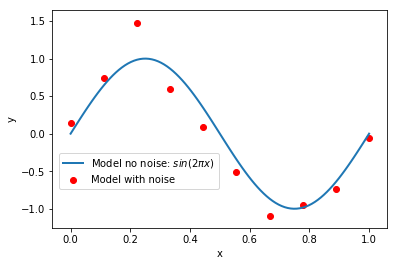

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt # plotting library
from ipywidgets import * # Interaction library

#Noise variance
var = 0.3

#Train set
train_size = 10
x_train = np.linspace(0,1,train_size)

#signal + noise
y_train = np.sin(2*np.pi*x_train) + np.random.normal(0,var,train_size) 

#Test set
test_size = 100
x_test= np.linspace(0,1,test_size)
y = np.sin(2*np.pi*x_test)
y_test = y + np.random.normal(0,var,test_size) #signal + noise

plt.figure()
plt.plot(x_test,y,linewidth = 2.0,label = r'Model no noise: $sin(2 \pi x)$')
plt.scatter(x_train,y_train,color='red',label = "Model with noise")
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Data

Observations: $$\boldsymbol{X} =(x_1,x_2,...,x_N)^T$$
Target:  $$\boldsymbol{T} =(t_1,t_2,...,t_N)^T$$


## Model

$$y(x,\boldsymbol{W})= w_0 + w_1x +w_2x^2+...+w_mx^m = \sum^M_{j=0}w_jx^j$$

## Cost Function

Quadratic cost function: $$E(\boldsymbol{W})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{W})-t_n\}^2$$

Computing the derivative of the cost function and amking it equal to zero, we can find the vector **W*** that minimizes the error:
$$ \boldsymbol{W}^* = (\boldsymbol{A}^T\boldsymbol{A})^{-1}\boldsymbol{A} ^T\boldsymbol{T}$$

Where **A** is defined by:

$$\boldsymbol{A} = \begin{bmatrix}
    1 & x_{1} & x_{1}^2 & \dots  & x_{1}^M \\
    1 & x_{2} & x_{2}^2 & \dots  & x_{2}^M \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{N} & x_{N}^2 & \dots  & x_{N}^M
\end{bmatrix}$$

In [2]:
#Least square polynomial fitting solution
def polynomial_fit(X,T,M):
    A = np.power(X.reshape(-1,1),np.arange(0,M+1).reshape(1,-1))
    T = T.reshape(-1,1)
    W = np.dot(np.linalg.pinv(A),T)
    return W.ravel()

Plotting the least squares result varying the polynomial degree between  0 a 9. **Which model is a good model?**

In [6]:
def plotmodel(M):
    coefs = polynomial_fit(x_train, y_train, M)[::-1]
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x_test,y,linewidth = 2.0,label = 'Real')
    plt.scatter(x_train,y_train,color='red',label= "Train")
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x_test) 
    plt.plot(x_test,y_fit,linewidth = 2.0,label ="Estimated")
    plt.plot(x_test,y_test,'x',color='black',label = "Test")
    plt.legend(loc=(0.02,0.02))
    plt.show()

interact(plotmodel,M=(0,9,1))  


<function __main__.plotmodel>

## Root mean squared error

$$E_{RMS}=\sqrt{2E(\boldsymbol{W^*})/N}$$

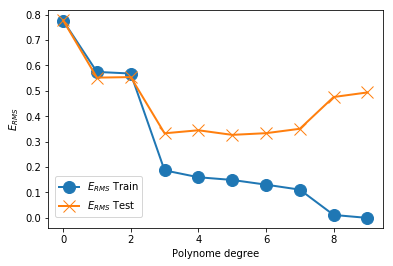

In [15]:
# Computes RMS error
def rms_error(X,T,W):
    p = np.poly1d(W)
    T_fit = p(X)
    E = np.sqrt(((T - T_fit)**2/T.size).sum())
    return E
   
m = range(10)
train = []
test = []

for M in m:
    W = polynomial_fit(x_train, y_train, M)[::-1]
    error_train = rms_error(x_train,y_train,W)
    error_test = rms_error(x_test,y_test,W)
    train.append(error_train)
    test.append(error_test)


plt.figure()
plt.plot(m,train,linewidth = 2.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Train')
plt.plot(m,test,linewidth = 2.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Test')
plt.legend(loc = (0.02, 0.05))
plt.xlabel("Polynome degree")
plt.ylabel(r'$E_{RMS}$')
plt.show()

Função de custo com regularização 
====================================

$$E(\boldsymbol{w})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{w})-t_n\}^2 +\frac{\lambda}{2}||\boldsymbol{W}||^2$$

A solução dessa expressão é dada por:

$$\boldsymbol{W}^* = (\boldsymbol{A}^T\boldsymbol{A} + \lambda n\boldsymbol{I})^{-1}\boldsymbol{A} ^T\boldsymbol{T} $$

In [8]:
#Mínimos quadrados com regularização
def polynomial_fit_reg(X,T,M,lamb):
    N = X.shape[0]
    A = np.power(X.reshape(-1,1),np.arange(0,M+1).reshape(1,-1))
    lambda_matrix = lamb*N*np.eye(M+1)
    T = T.reshape(-1,1)
    aux = np.dot(A.T,A) + lambda_matrix
    aux = np.linalg.pinv(aux)
    aux2 = np.dot(A.T,T)
    W = np.dot(aux,aux2)
    return W.ravel()

No demo abaixo, mostramos a influência do $\lambda$ e do $M$ no ajuste polinomial.

In [14]:
def plotmodel2(M,log_lamb):
    lamb = np.exp(log_lamb)
    coefs = polynomial_fit_reg(x_train, y_train, M,lamb)[::-1]
    print "W:",coefs
    print "Lambda", lamb
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x_test,y,linewidth = 2.0,label = 'Real')
    plt.scatter(x_train,y_train,color='red',label= "Train")
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x_test) 
    plt.plot(x_test,y_fit,linewidth = 2.0,label ="Estimated")
    plt.plot(x_test,y_test,'x',color='black',label = "Test")
    plt.legend(loc=(0.02,0.02))
    plt.show()
interact(plotmodel2,M=(0,9,1),log_lamb = (-40,-15,.1))  

<function __main__.plotmodel2>

No demo abaixo mostramos a influência do parâmetro $\lambda$ no ajuste de um polinômio de grau 9.

30
30


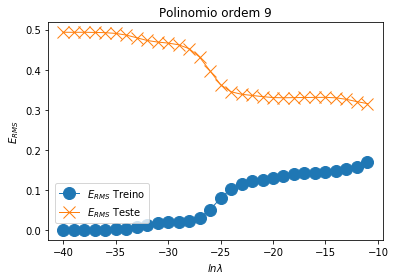

In [13]:
log_lamb = range(-40,-10)

M = 9
train = []
test = []
for l in log_lamb:
    lamb = np.exp(l)
    coeffs = polynomial_fit_reg(x_train, y_train, M,lamb)[::-1]
    error_train = rms_error(x_train,y_train,coeffs)
    error_test = rms_error(x_test,y_test,coeffs)
    train.append(error_train)
    test.append(error_test)

print len(train)
print len(log_lamb)
plt.figure()
plt.plot(log_lamb,train,linewidth = 1.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Train')
plt.plot(log_lamb,test,linewidth = 1.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Test')
plt.legend(loc = (0.02, 0.075))
plt.xlabel(r'$ln\lambda$')
plt.ylabel(r'$E_{RMS}$')
plt.title("Polynome degree 9")
plt.show()

Sugestão de atividades:
===============

- Mude o sinal de entrada;
- Mude a intensidade do ruído;
- Use mais dados para treinar o seu modelo;
- ...